## Daily Sales Trend

This line chart below shows the number of units sold each day throughout August.

- The chart reveals noticeable peaks on **August 4, 10, and 14**, indicating high-activity days.  
- There are visible dips after each peak, showing potential campaign effects or day-of-week variation.  
- Understanding these trends can help optimize stock planning and promotional timing.


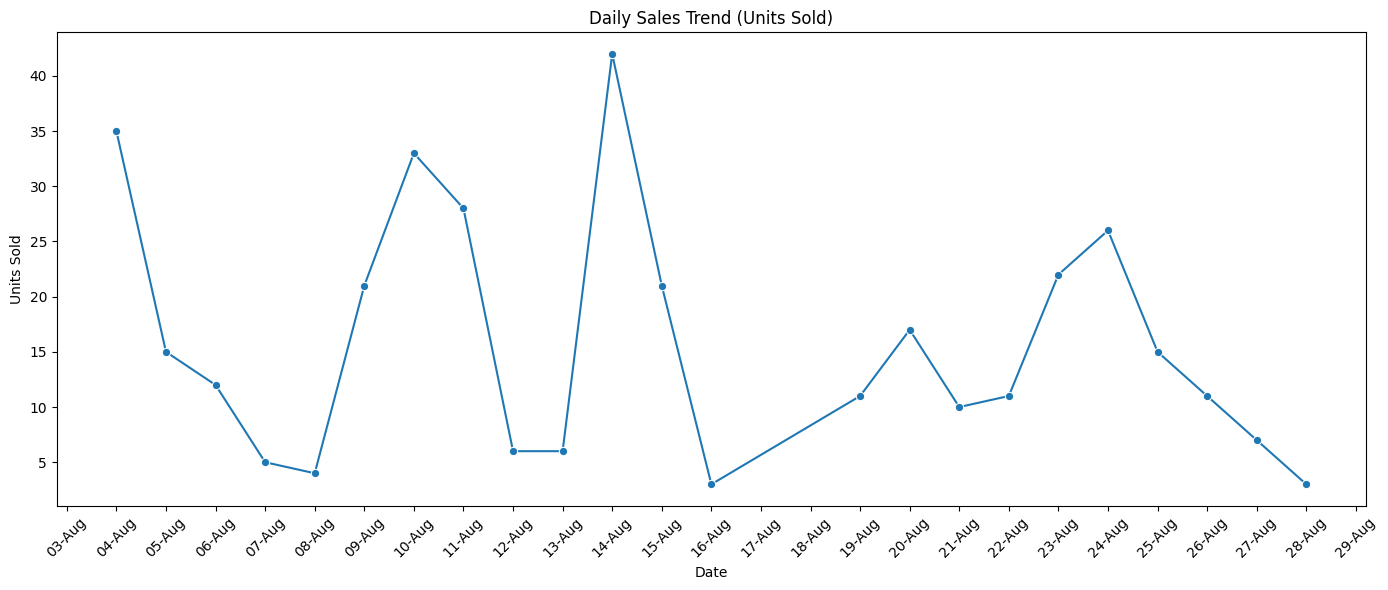

In [8]:
import matplotlib.dates as mdates

df['order_date_only'] = pd.to_datetime(df['order_date']).dt.date
daily_sales = df.groupby('order_date_only')['quantity'].sum().reset_index()

daily_sales['order_date_only'] = pd.to_datetime(daily_sales['order_date_only'])

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=daily_sales, x='order_date_only', y='quantity', marker='o')

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.xticks(rotation=45)
plt.title("Daily Sales Trend (Units Sold)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


## Total Quantity Sold per Product Category

This bar chart below shows the total units sold by product category in **August 2024**.

- **Dishwashers**, **Washing Machines**, and **Ovens** were the top-selling categories.  
- **Meat Grinders**, **Dust Bags**, and **Other** had the lowest sales.  
- The results highlight strong customer demand for core white goods.

This helps identify which products drive the most sales and guide future stock and marketing strategies.


Mounted at /content/drive


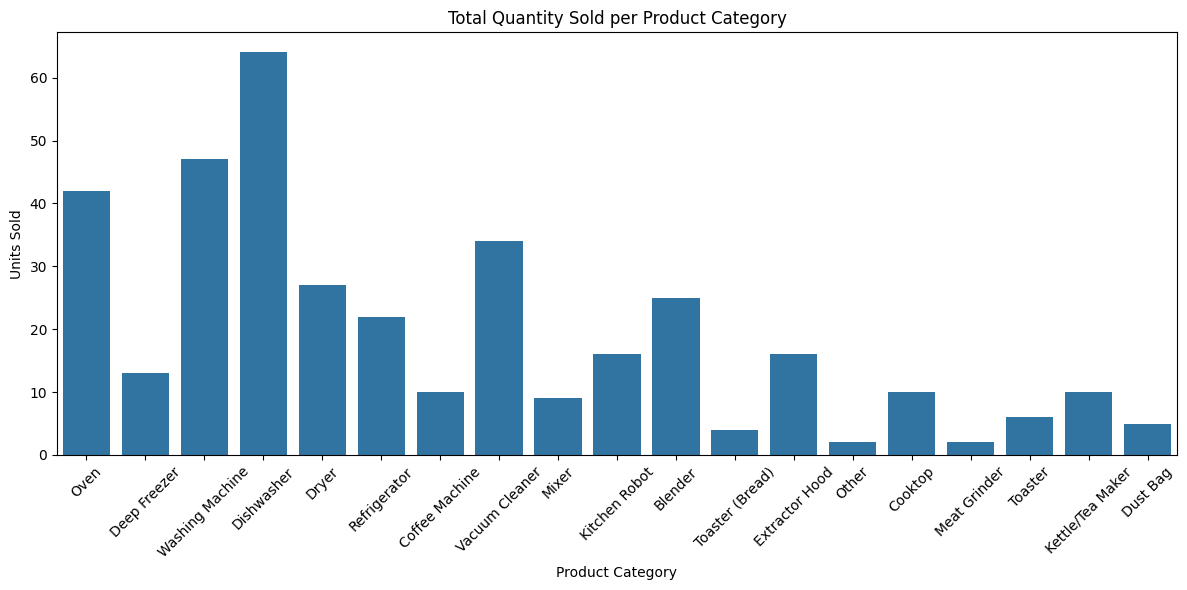

In [6]:
# 2. Total Quantity Sold by Category
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/dsaproje/cleaned.csv")

# Eğer 'order_date' gibi sütunlar datetime ise:
df['order_date'] = pd.to_datetime(df['order_date'])

plt.figure(figsize=(12,6))
sns.barplot(x='category', y='quantity', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title("Total Quantity Sold per Product Category")
plt.ylabel("Units Sold")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


## Order Frequency by Hour

This histogram below displays the number of orders placed by each hour of the day.

- Order volume starts increasing after **09:00**, peaking around **13:00** and **21:00**.  
- **Late evening and lunchtime hours** show the highest order activity.  
- Early morning (before 08:00) and very late night hours have minimal activity.

These trends can guide optimal campaign timing and staffing decisions.


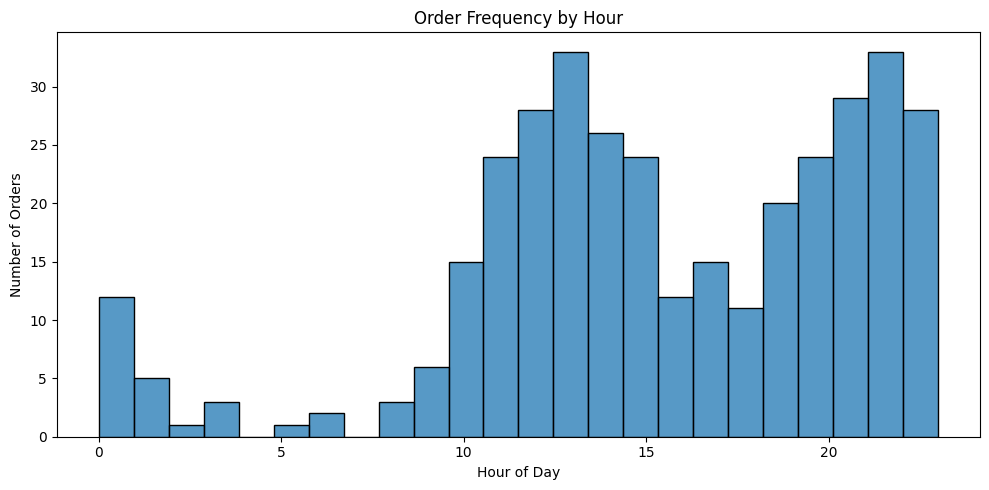

In [7]:
# 3. Order Count by Hour of Day
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', bins=24, kde=False, stat="count")
plt.title("Order Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


## Product Category Distribution by Gender

This grouped bar chart shows how different product categories are distributed across customer genders.

- Male customers purchased more in nearly all categories, especially **Dishwashers** and **Washing Machines**.
- Female customers showed higher interest in categories like **Kitchen Robots**, **Coffee Machines**, and **Blenders**.
- The `"Unknown"` category had minimal representation, suggesting the gender estimation process covered most customers.


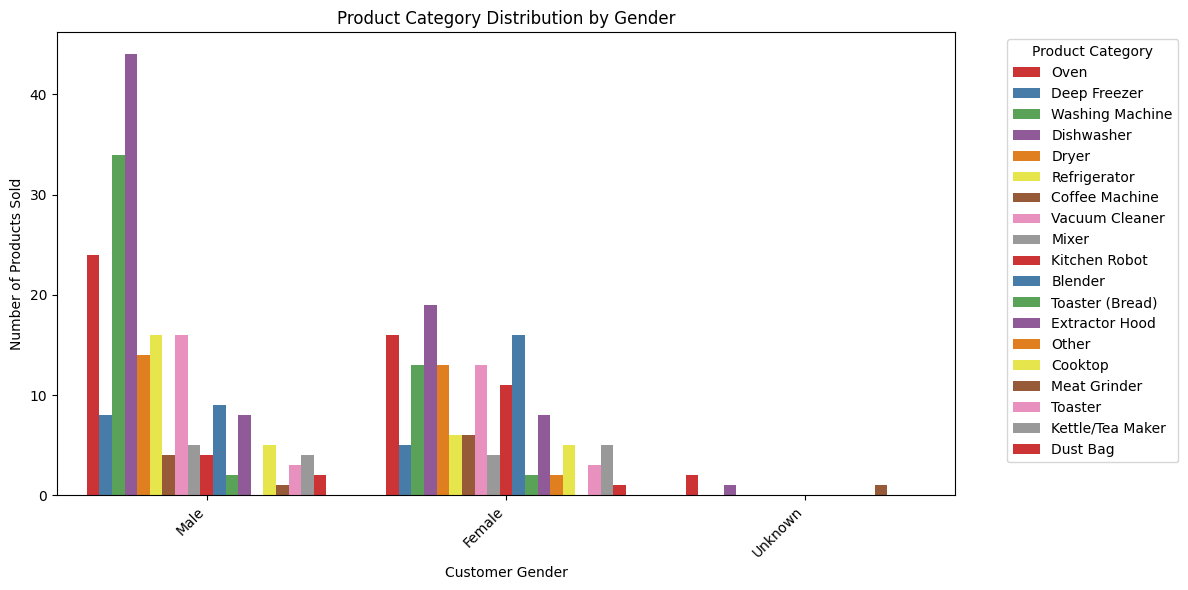

In [12]:

plt.figure(figsize=(12, 6))
sns.countplot(x='guessed_gender', hue='category', data=df, palette="Set1", dodge=True)
plt.title("Product Category Distribution by Gender")
plt.ylabel("Number of Products Sold")
plt.xlabel("Customer Gender")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Sales by City

- Visualizes total product sales per city.
- Istanbul, Ankara, and Antalya show the highest number of units sold.
- Highlights regional demand differences across Turkey.
- Useful for identifying high-performing locations.
- Can support regional marketing and inventory planning.


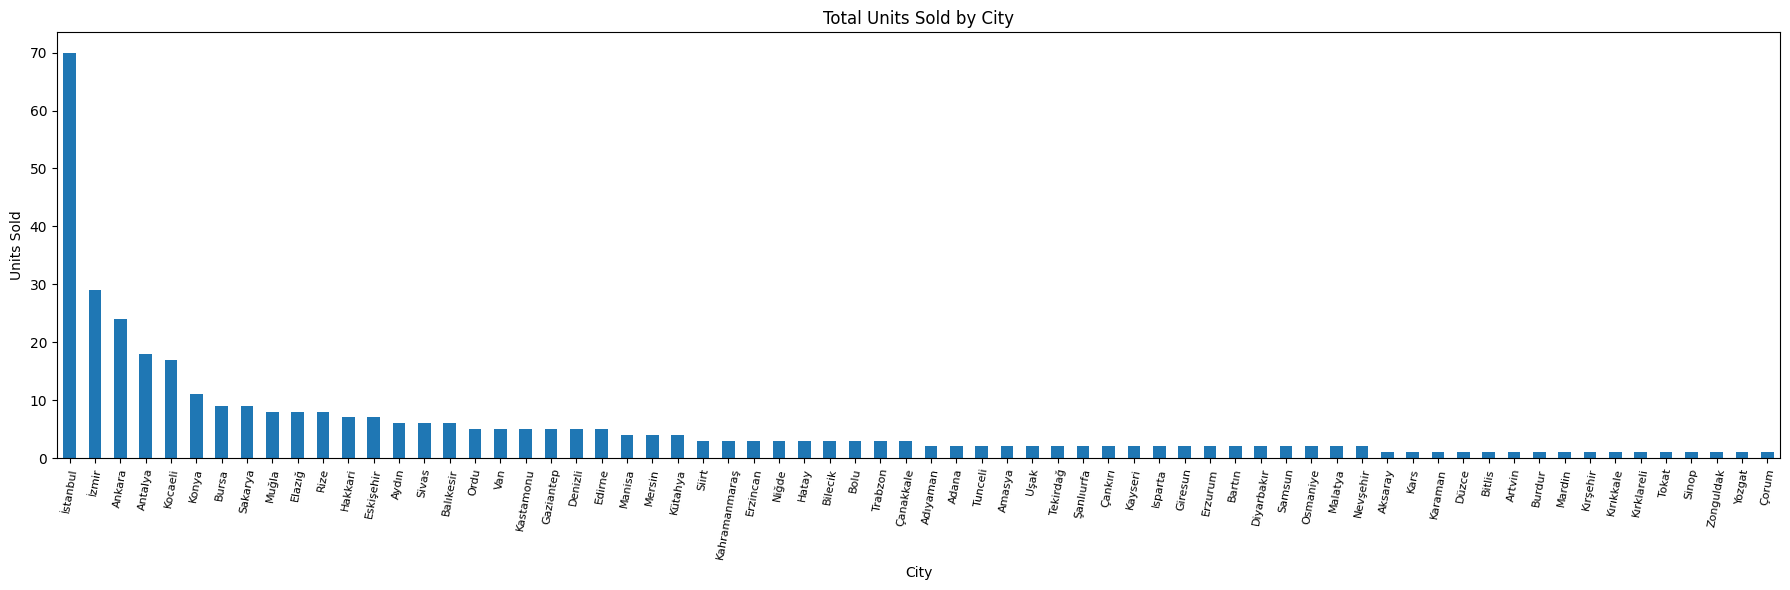

In [24]:
plt.figure(figsize=(18, 6))
city_sales = df.groupby('city')['quantity'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar')

plt.title("Total Units Sold by City")
plt.xlabel("City")
plt.ylabel("Units Sold")
plt.xticks(rotation=80, fontsize=8)
plt.tight_layout()
plt.show()


## Product Category Distribution by Customer Age

- This grouped bar chart displays the distribution of product category purchases segmented by customer **age range**.
- Each bar shows the **number of units sold** for a given product category within each **age group** (e.g., 21–30, 31–40).
- It helps identify **age-based customer preferences** in product categories.
- For example, the 31–40 age group appears to purchase a wider variety and higher volume of appliances such as washing machines and dishwashers.
- This visualization is useful for **targeted marketing**, **product positioning**, and **demographic analysis**.


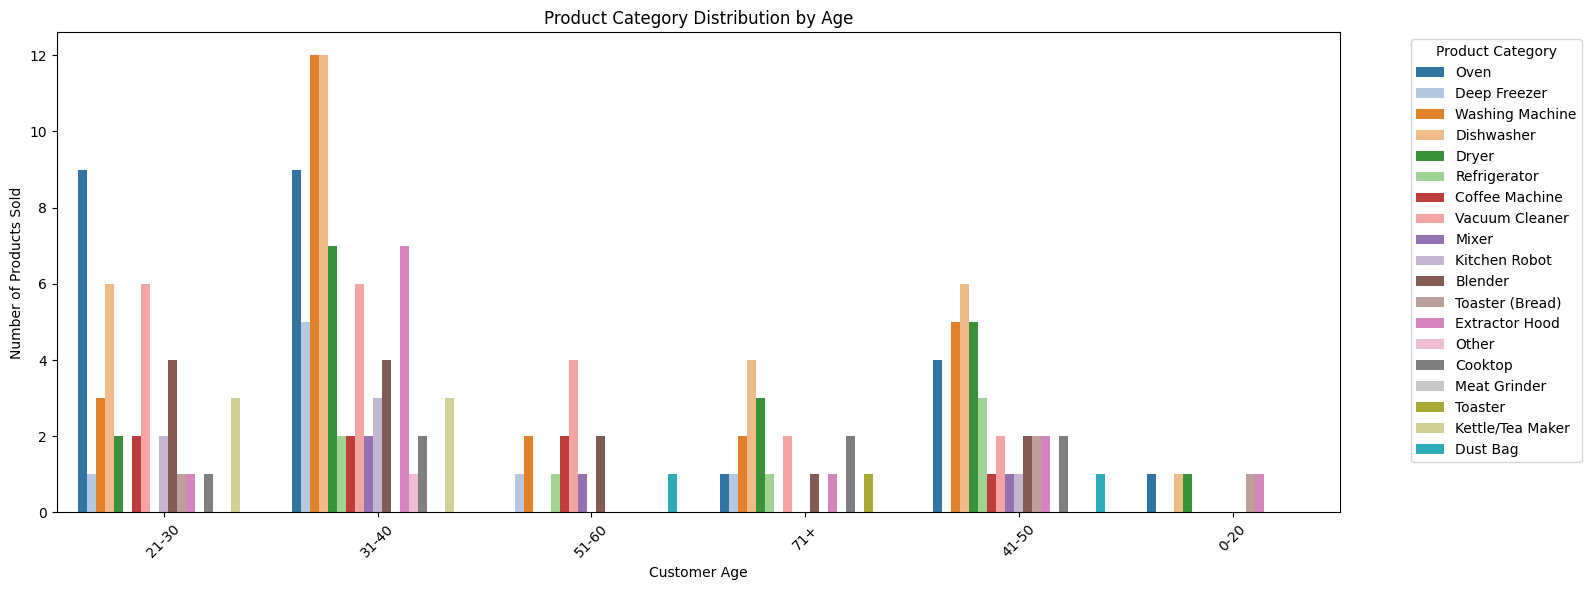

In [25]:
plt.figure(figsize=(16, 6))
sns.countplot(x='age', hue='category', data=df, palette='tab20', dodge=True)
plt.title("Product Category Distribution by Age")
plt.xlabel("Customer Age")
plt.ylabel("Number of Products Sold")
plt.xticks(rotation=45)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Sales Heatmap by Day and Hour

- This heatmap visualizes the **distribution of sales** across **days of the week** and **hours of the day**.
- Darker shades indicate **higher concentrations of sales**, while lighter areas indicate lower activity.
- The chart highlights **peak shopping times**, such as Friday evenings and Sunday afternoons.
- It helps uncover **temporal purchasing patterns**, which can support decisions in staffing, marketing timing, and stock management.


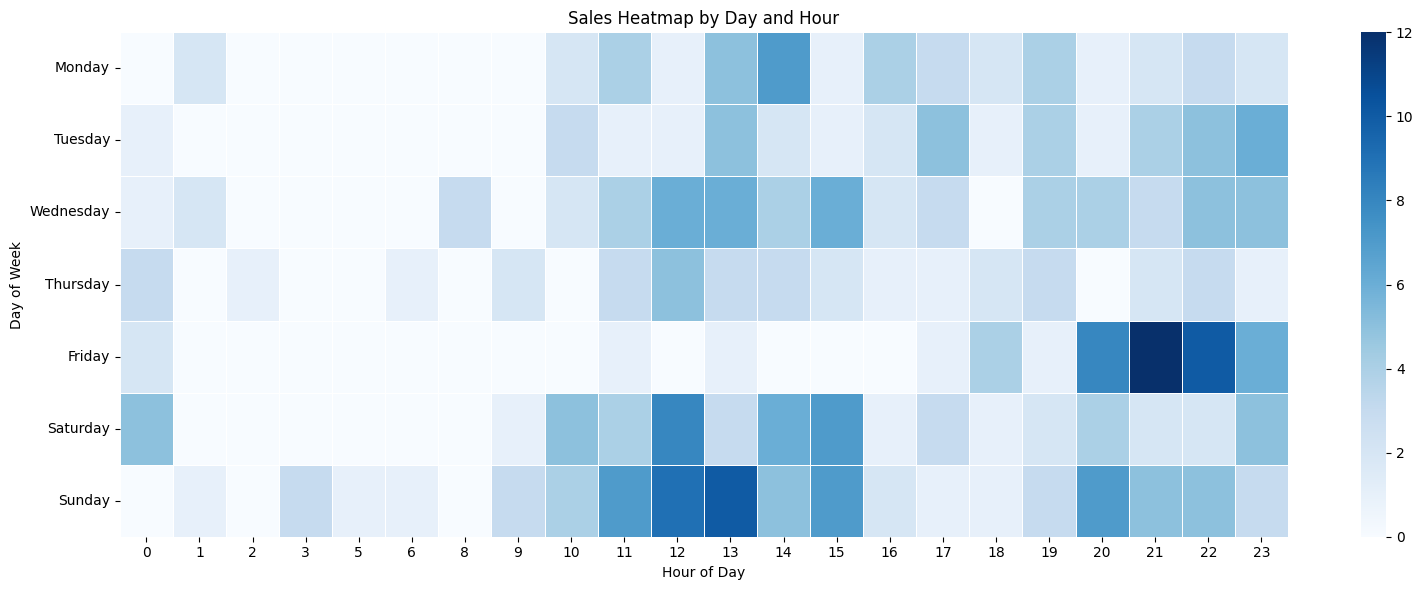

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pivot table: Satış miktarlarını (quantity) gün ve saat bazında özetle
heatmap_data = df.pivot_table(
    index='day_of_week',
    columns='hour',
    values='quantity',
    aggfunc='sum'
).fillna(0)

# 2. Günleri haftalık sıraya göre düzenle (isteğe bağlı)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3. Heatmap çiz
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
